In [84]:
# Importing Libraries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

In [4]:
df[['job_title_short', 'job_skills']].head(5)

,job_title_short,job_skills
0,Senior Data Engineer,None
1,Data Analyst,"[r, python, sql, nosql, power bi, tableau]"
2,Data Engineer,"[python, sql, c#, azure, airflow, dax, docker,..."
3,Data Engineer,"[python, c++, java, matlab, aws, tensorflow, k..."
4,Data Engineer,"[bash, python, oracle, aws, ansible, puppet, j..."


In [7]:
df_exploded = df.explode('job_skills')

<Axes: xlabel='job_skills'>

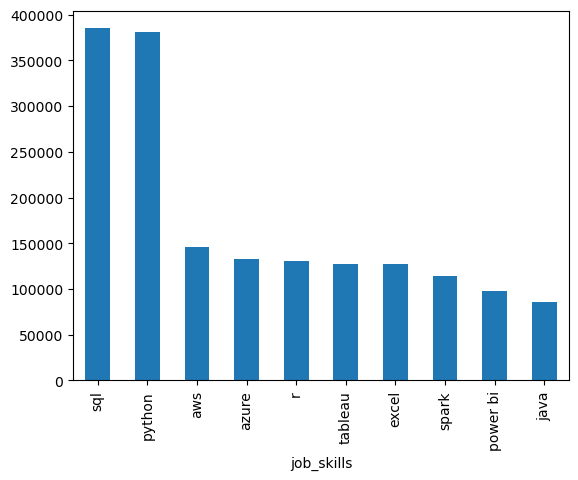

In [9]:
df_exploded['job_skills'].value_counts().head(10).plot(kind='bar')

In [ ]:
skills_count = df_exploded.groupby(['job_title_short', 'job_skills']).size()
# Es una serie. Debemos usar reset_index()

In [14]:
df_skills_count = skills_count.reset_index(name='skills_count')
df_skills_count

,job_title_short,job_skills,skills_count
0,Business Analyst,airflow,318
1,Business Analyst,airtable,17
2,Business Analyst,alteryx,1078
3,Business Analyst,angular,87
4,Business Analyst,ansible,120
...,...,...,...
2251,Software Engineer,wrike,4
2252,Software Engineer,wsl,13
2253,Software Engineer,xamarin,35
2254,Software Engineer,yarn,145


In [26]:
df_skills_count = df_skills_count.sort_values(by='skills_count', ascending=False)
df_skills_count

,job_title_short,job_skills,skills_count
1066,Data Scientist,python,113711
865,Data Engineer,sql,113130
830,Data Engineer,python,108022
625,Data Analyst,sql,92428
1101,Data Scientist,sql,78982
...,...,...,...
1166,Machine Learning Engineer,blazor,1
1213,Machine Learning Engineer,gatsby,1
410,Cloud Engineer,theano,1
2241,Software Engineer,visualbasic,1


In [32]:
job_title = 'Data Analyst'
top_skills = 15

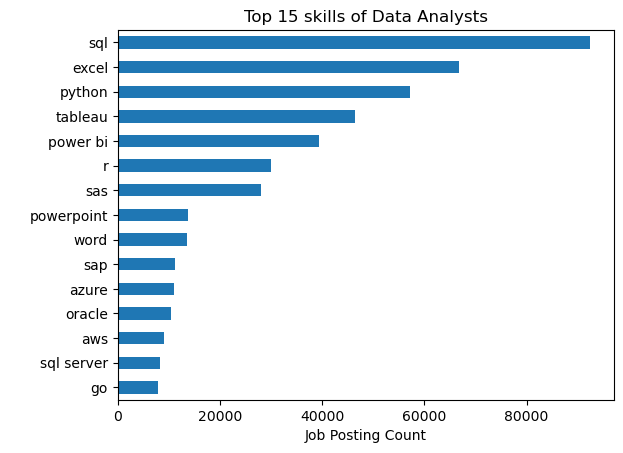

In [33]:
df_skills_final = df_skills_count[df_skills_count['job_title_short']==job_title].head(top_skills)
df_skills_final.plot(kind='barh', x='job_skills', y='skills_count')
plt.gca().invert_yaxis() #Invertir los datos del eje y
plt.title(f'Top {top_skills} skills of {job_title}s')
plt.xlabel('Job Posting Count')
plt.ylabel(' ')
plt.legend().set_visible(False)
plt.show()

Ejercicio: Trending skills

In [37]:
df_DA = df[df['job_title_short']=='Data Analyst'].copy()

In [39]:
df_DA['job_posted_month_no']= df_DA['job_posted_date'].dt.month

In [42]:
df_DA_exploded = df_DA.explode('job_skills')

In [47]:
df_pivot_DA = df_DA_exploded.pivot_table(index='job_posted_month_no', columns='job_skills', aggfunc='size', fill_value=0)
df_pivot_DA.loc['Total'] = df_pivot_DA.sum() # Crea una nueva fila que muestra el total de cada columna
df_pivot_DA

job_skills,airflow,airtable,alteryx,angular,angular.js,ansible,apl,arch,asana,asp.net,...,webex,windows,wire,word,workfront,wrike,wsl,xamarin,yarn,zoom
job_posted_month_no,,,,,,,,,,,,,,,,,,,,,
1,197,17,551,63,2,20,2,1,29,34,...,17,228,6,1778,0,11,6,0,9,95
2,169,2,448,49,0,14,1,4,27,13,...,9,202,6,1235,4,2,5,0,4,41
3,181,4,442,34,0,23,6,1,17,13,...,8,194,8,1203,1,1,3,1,5,45
4,155,4,413,22,0,11,8,9,9,15,...,9,185,14,1177,8,2,1,0,6,26
5,128,8,310,30,0,19,9,2,8,21,...,11,122,3,957,3,4,0,0,7,18
6,164,14,393,29,0,14,9,4,16,16,...,8,157,14,1237,6,6,0,0,11,34
7,207,4,366,15,0,8,5,8,19,12,...,5,161,11,1069,0,3,0,0,6,38
8,197,3,413,21,0,12,10,3,13,12,...,9,184,11,1298,0,1,0,0,11,41
9,118,4,317,21,0,14,3,10,12,10,...,4,150,8,945,0,1,0,0,5,25


In [49]:
df_pivot_DA.loc['Total'].sort_values(ascending=False)   #Filtra por la fila Total creada

job_skills
sql          92428
excel        66860
python       57190
tableau      46455
power bi     39380
             ...  
esquisse         1
suse             1
capacitor        1
chainer          1
msaccess         1
Name: Total, Length: 235, dtype: int64

In [51]:
df_pivot_DA.loc['Total'].sort_values(ascending=False).index  # Se toman los index solamente

Index(['sql', 'excel', 'python', 'tableau', 'power bi', 'r', 'sas',
       'powerpoint', 'word', 'sap',
       ...
       'angular.js', 'xamarin', 'gtx', 'nuxt.js', 'ovh', 'esquisse', 'suse',
       'capacitor', 'chainer', 'msaccess'],
      dtype='object', name='job_skills', length=235)

In [52]:
df_pivot_DA[df_pivot_DA.loc['Total'].sort_values(ascending=False).index] # Se filtra en el propio DF

job_skills,sql,excel,python,tableau,power bi,r,sas,powerpoint,word,sap,...,angular.js,xamarin,gtx,nuxt.js,ovh,esquisse,suse,capacitor,chainer,msaccess
job_posted_month_no,,,,,,,,,,,,,,,,,,,,,
1,11336,8170,6606,5596,4285,3607,3830,1880,1778,1251,...,2,0,0,1,0,0,0,1,0,0
2,7947,5772,4751,3936,3307,2576,2634,1291,1235,954,...,0,0,0,0,0,0,0,0,0,0
3,7868,5675,4741,4051,3176,2650,2554,1266,1203,892,...,0,1,0,0,0,0,1,0,0,0
4,7553,5496,4557,3776,3106,2399,2598,1190,1177,947,...,0,0,0,0,1,0,0,0,0,0
5,6617,4773,4070,3245,2695,2093,1940,979,957,851,...,0,0,0,0,0,0,0,0,0,1
6,7584,5724,4707,3812,3275,2442,2174,1173,1237,987,...,0,0,0,0,0,0,0,0,0,0
7,7687,5513,4831,3928,3350,2444,2118,1096,1069,996,...,0,0,1,0,0,0,0,0,0,0
8,8823,6482,5576,4533,3859,2975,2560,1332,1298,1117,...,0,0,0,0,0,0,0,0,0,0
9,6829,4886,4229,3446,3118,2146,1880,944,945,852,...,0,0,0,0,0,0,0,0,0,0


In [58]:
df_pivot_DA = df_pivot_DA[df_pivot_DA.loc['Total'].sort_values(ascending=False).index]
df_pivot_DA = df_pivot_DA.drop('Total') #Eliminamos la fila Total creada para el filtro

<Axes: xlabel='job_posted_month_no'>

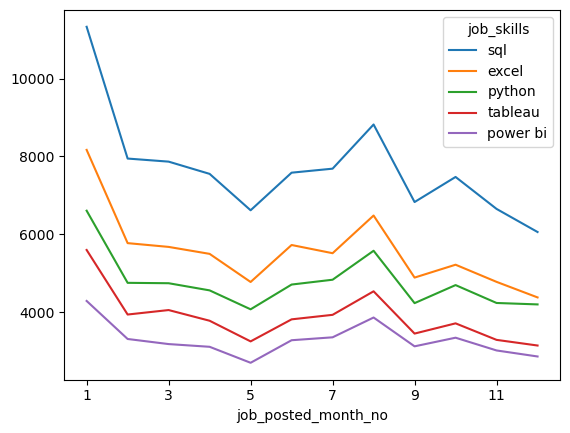

In [60]:
df_pivot_DA.iloc[:, :5].plot(kind='line')

Ejercicios

In [61]:
# Using the ast library, clean up the job_skills column to be of the list data type in preparation for exploding this column.
# Explode the job_skills column in the DataFrame and create a bar plot using pandas of the top 10 most common skills for Cloud Engineer.
# Add labels for the x-axis (label as 'Skills'), y-axis (label as 'Count') and a title (set as 'Top 10 Most Common Skills for Cloud Engineers') for the plot.

In [85]:
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [86]:
df_CD_exploded = df.explode('job_skills')

In [69]:
df_CE_final = df_CD_exploded[df_CD_exploded['job_title_short'] == 'Cloud Engineer']

Text(0.5, 1.0, 'Top 10 Most Common Skills for Cloud Engineer')

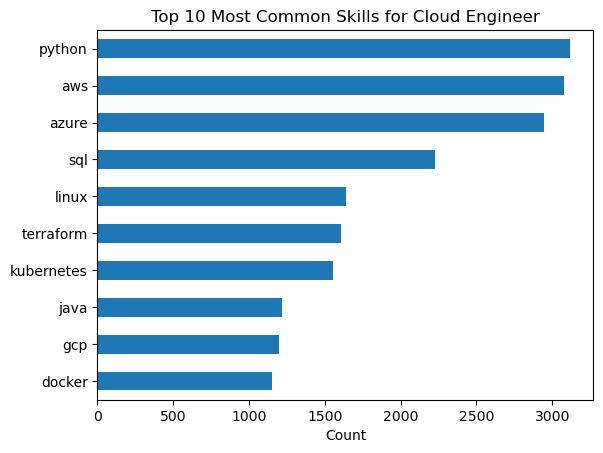

In [76]:
df_CE_final['job_skills'].value_counts().head(10).plot(kind='barh')
plt.gca().invert_yaxis()
plt.xlabel('Count')
plt.ylabel('')
plt.title('Top 10 Most Common Skills for Cloud Engineer')

In [77]:
# Explode the job_skills column in the DataFrame and calculate the average salary for each skill. 
# Display the top 5 skills with the highest average salary.

In [91]:
df_jobs = df_CD_exploded.groupby('job_skills')['salary_year_avg'].mean().reset_index()
df_jobs = df_jobs.sort_values(by='salary_year_avg', ascending=False).head()
df_jobs

,job_skills,salary_year_avg
46,debian,196500.000000
177,ringcentral,182500.000000
114,lua,170500.000000
126,mongo,169526.929749
54,dplyr,160667.210526


In [92]:
# Calculate the number of unique skills required for each job_title_short.
# Explode the job_skills column
# Group by job_title_short
# Count unique skills per title (i.e., num_unique_skills)
# Rename the result column to num_unique_skills and show the first 5 rows

In [105]:
df_exploded_final = df_CD_exploded.groupby('job_title_short')['job_skills'].nunique().reset_index()  #conteo de valores unicos
df_exploded_final.columns = ['job_title_short','num_unique_skills']  #Renombrar columna
df_exploded_final

,job_title_short,num_unique_skills
0,Business Analyst,223
1,Cloud Engineer,213
2,Data Analyst,235
3,Data Engineer,239
4,Data Scientist,237
5,Machine Learning Engineer,222
6,Senior Data Analyst,207
7,Senior Data Engineer,226
8,Senior Data Scientist,215
9,Software Engineer,239
